# Data Science & Machine Learning Project on Supply Chain Management

Supply chain management (SCM) is the centralized management of the flow of goods and services to and from a company and includes all of the processes involved in transforming raw materials and components into final products

## Project Overview

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two 
years back.
 Their higher management has noticed that there is a mismatch in the demand and 
supply
. Where the demand is high, supply is pretty low and vice-versa which results in a loss inn
inventory cost and ultimately loss to th
e comna
y. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire cun try.

## Goals

The objective of the project is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.


## Features in the dataset

1) Ware_house_ID                 : Unique Warehouse id where product is prepared for dispatch.
2) WH_Manager_ID                 : Manager Id present in the warehouse
3) zone                          : Zone of the Warehouse
4) WH_regional_zone              : Regional Zone of the warehouse
5) num_refill_req_l3m            : Refilling request received by the warehouse in the last 3 months
6) transport_issue_l1y           : No. of transport issued for warehouse in last 1myear
7) Competitor_in_mkt             : No. of competitors in the market
8) retail_shop_num               : Number of retail shops who sell noodles produced by the warehouse
9) wh_owner_type                 : The warehouse is owned by the company or it is on rent
10) distributor_num              : No. of distributor who works between warehouse and retail shops
11) flood_impacted               : Is the warehouse in a flood impacted area or not
12) flood_proof                  : Warehouse is having flood proof indicator
13) electric_supply              : Does the warehouse have proper electric supply along with some power backup
14) dist_from_hub                : distance from the warehouse to production hub
15) workers_num                  : no. workers in the warehouse
16) wh_est_year                  : warehouse establishment year
17) storage_issue_reported_l3m   : storage issues reported by the warehouse in the last 3months.
18) temp_reg_mach                : warehouse having temperature regulating machine indicator or not
19) approved_wh_govt_certificate : Type of approval warehouse having been issued by government
20) wh_breakdown_l3m             : Number of times the warehouse faces the breakdown in the last 3 months
21) product_wg_ton               : Product weight


Importing the libraries

In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data collection

Loading dataset 

In [233]:
#training dataset 
df_train=pd.read_csv('supply_train.csv')
#testing dataset
df_test=pd.read_csv('supply_test.csv')

## Data exploration

#### Exploratory data analysis

In [234]:
df_train.head(2)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074


In [235]:
df_train.shape

(16620, 25)

Training dataset contains 16620 rows and 25 columns

In [236]:
df_train.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [237]:
#Removing the unwanted column 
df_train=df_train.iloc[:,1:]
df_train.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074


In [238]:
df_test.head(2)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075


In [239]:
df_test.shape

(5529, 25)

Testing data set contains 5529 rows and 25 columns

In [240]:
df_test.columns


Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [241]:
#Removing the unwanted column 
df_test=df_test.iloc[:,1:]
df_test.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,...,1,79,31.0,2019.0,5,1,C,2,24,6075


In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [243]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 5529 non-null   object 
 1   WH_Manager_ID                 5529 non-null   object 
 2   Location_type                 5529 non-null   object 
 3   WH_capacity_size              5529 non-null   object 
 4   zone                          5529 non-null   object 
 5   WH_regional_zone              5529 non-null   object 
 6   num_refill_req_l3m            5529 non-null   int64  
 7   transport_issue_l1y           5529 non-null   int64  
 8   Competitor_in_mkt             5529 non-null   int64  
 9   retail_shop_num               5529 non-null   int64  
 10  wh_owner_type                 5529 non-null   object 
 11  distributor_num               5529 non-null   int64  
 12  flood_impacted                5529 non-null   int64  
 13  flo

In [244]:
df_train.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [245]:
df_test.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [246]:
df_train.dtypes.value_counts()

int64      14
object      8
float64     2
Name: count, dtype: int64

In [247]:
df_test.dtypes.value_counts()

int64      14
object      8
float64     2
Name: count, dtype: int64

Both Dataset contains 24 columns with 16620 rows in training dataset and 5529 rows in testing dataset .
Out of 24 features 16 are numerical and 8 are categorical datatypes.

## Data preprocessing

In [248]:
df_train.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [249]:
#managing rows with null values
df_train['workers_num'].fillna(df_train['workers_num'].median(),inplace=True)
df_train['wh_est_year'].fillna(df_train['wh_est_year'].median(),inplace=True)
df_train['approved_wh_govt_certificate'].fillna('NIL',inplace=True)

In [250]:
df_train.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [251]:
df_test.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [252]:
#managing rows with null values
df_test['workers_num'].fillna(df_test['workers_num'].median(),inplace=True)
df_test['wh_est_year'].fillna(df_test['wh_est_year'].median(),inplace=True)
df_test['approved_wh_govt_certificate'].fillna('NIL',inplace=True)

In [253]:
df_test.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [254]:
df_train.duplicated().sum()

0

In [255]:
df_test.duplicated().sum()

0

In [256]:
#seperating numerical and categorical columns
num_cols=df_train.select_dtypes(include='number')
cat_cols=df_train.select_dtypes(exclude='number')

In [257]:
num_cols.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [258]:
cat_cols.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [259]:
# counting the number of occurrences of each unique value for all numerical columns
for i in num_cols:
    a=df_train[i].value_counts()
    print(i,a)

num_refill_req_l3m num_refill_req_l3m
8    2032
3    1984
5    1967
7    1941
0    1900
4    1885
6    1857
1    1835
2    1219
Name: count, dtype: int64
transport_issue_l1y transport_issue_l1y
0    10094
1     3072
2     1437
3     1272
4      508
5      237
Name: count, dtype: int64
Competitor_in_mkt Competitor_in_mkt
2     5790
3     4702
4     4438
5      825
6      375
1      291
7      136
8       49
10       6
9        6
12       1
0        1
Name: count, dtype: int64
retail_shop_num retail_shop_num
4808    18
5022    17
4367    17
4611    16
4439    16
        ..
7176     1
3483     1
8522     1
7570     1
7347     1
Name: count, Length: 4356, dtype: int64
distributor_num distributor_num
21    328
69    323
49    322
35    321
59    319
63    319
47    318
36    317
37    315
41    314
40    314
28    313
44    311
31    311
24    309
42    307
38    307
57    305
30    304
54    303
50    303
65    302
29    302
48    301
23    300
64    299
56    299
22    298
20    297
15   

In [260]:
# counting the number of occurrences of each unique value for all categorical columns
for i in cat_cols:
    b=df_train[i].value_counts()
    print(i,b)

Ware_house_ID Ware_house_ID
WH_100000    1
WH_111101    1
WH_111071    1
WH_111072    1
WH_111073    1
            ..
WH_105545    1
WH_105546    1
WH_105547    1
WH_105548    1
WH_116619    1
Name: count, Length: 16620, dtype: int64
WH_Manager_ID WH_Manager_ID
EID_50000    1
EID_61101    1
EID_61071    1
EID_61072    1
EID_61073    1
            ..
EID_55545    1
EID_55546    1
EID_55547    1
EID_55548    1
EID_66619    1
Name: count, Length: 16620, dtype: int64
Location_type Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64
WH_capacity_size WH_capacity_size
Large    6743
Mid      6691
Small    3186
Name: count, dtype: int64
zone zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64
WH_regional_zone WH_regional_zone
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: count, dtype: int64
wh_owner_type wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64
approv

In [261]:
# counting the number of  unique values in all numerical columns
for i in num_cols:
    c=df_train[i].unique()
    print(i ,':',c)

num_refill_req_l3m : [3 0 1 7 8 4 6 5 2]
transport_issue_l1y : [1 0 4 3 2 5]
Competitor_in_mkt : [ 2  4  3  5  1  8  7  6 10  9 12  0]
retail_shop_num : [4651 6217 4306 ... 2716 8344 7347]
distributor_num : [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
flood_impacted : [0 1]
flood_proof : [1 0]
electric_supply : [1 0]
dist_from_hub : [ 91 210 161 103 112 152  77 241 124  78 150 225  95 242 129 190 231 261
 159 189  65 156 199  80 140  67 229  98 154 230 164 197 262 125  94 153
 216 247 123 167 220 134  64 196 240  85 253  66 168 219 110  69 239 237
 113 181 255  90 151  58 256  84  83 173 212 158  55 257  70 160  96 108
 271 263 234 109 198 182 114 166 141 165 204  60 130 254 227 248 252 177
 105  79 232 171  92 223 144  86 128 145  99 115 187 200 260 215  97 106
 133 218 119 206 233 235  81 264 142 101 186 246 176 267 211 221 175 195
 170 149 214 157 146 194 27

In [262]:
# counting the number of  unique values in all categorical columns
for i in cat_cols:
    d=df_train[i].unique()
    print(i ,':',d)

Ware_house_ID : ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
WH_Manager_ID : ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
Location_type : ['Urban' 'Rural']
WH_capacity_size : ['Small' 'Large' 'Mid']
zone : ['West' 'North' 'South' 'East']
WH_regional_zone : ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
wh_owner_type : ['Rented' 'Company Owned']
approved_wh_govt_certificate : ['A' 'A+' 'C' 'B' 'B+' 'NIL']


## Data visualization

#### Visualizing Numerical features 

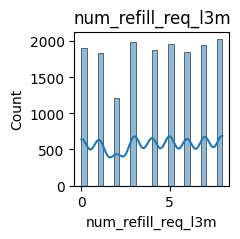

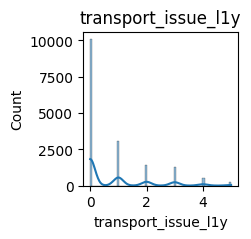

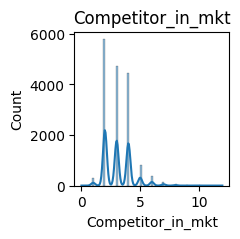

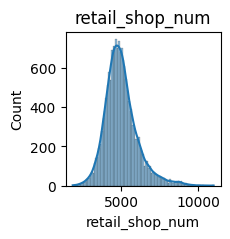

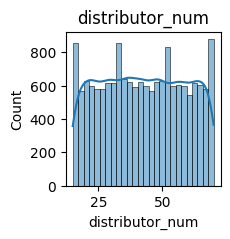

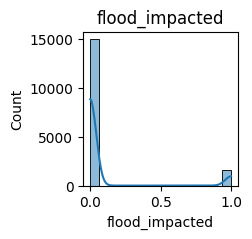

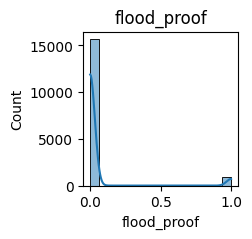

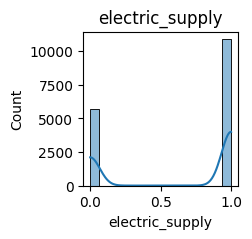

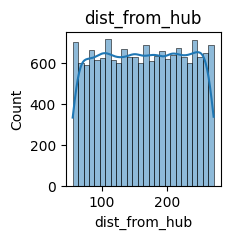

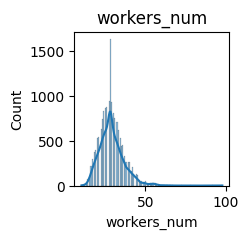

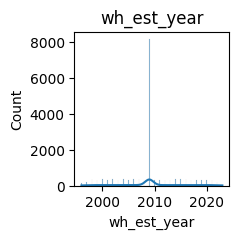

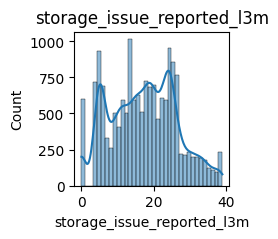

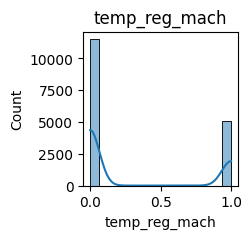

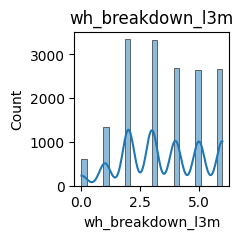

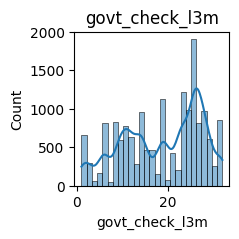

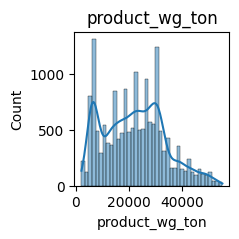

In [263]:
#Plotting histograms for numerical columns
for cols in num_cols:   
    plt.figure(figsize=(2,2))
    sns.histplot(data=df_train,x=df_train[cols],kde=True)
    plt.xlabel(cols)
    plt.title(cols)
    plt.show()

#### Visualizing Categorical features 

In [264]:
cat_cols.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

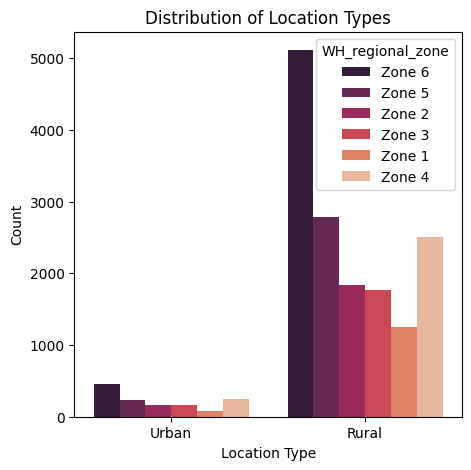

In [265]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_train, x='Location_type',hue='WH_regional_zone',palette='rocket')
plt.title('Distribution of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

Rural area has more number of warehouses than urban.
Zone 6 majority warehouses and zone 1 has the least.
Zone 6 in rural area has the highest number of warehouses and the least is in Zone 1 urban area 


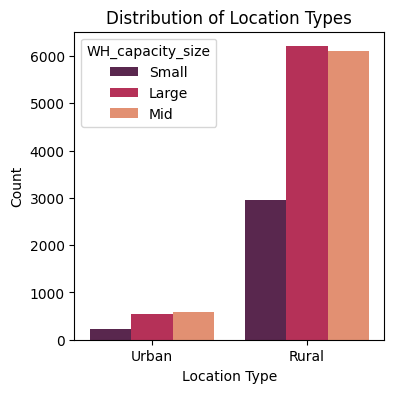

In [266]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train, x='Location_type',hue='WH_capacity_size',palette='rocket')
plt.title('Distribution of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

Rural area has warehouses with large and mid capacity size than urban
Urban area has more number of mid sized warehouses .

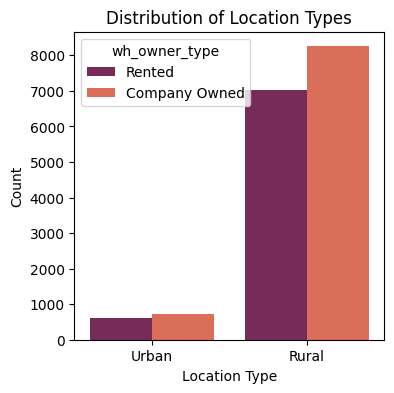

In [267]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train, x='Location_type',hue='wh_owner_type',palette='rocket')
plt.title('Distribution of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

In rural and urban area most of the warehouses are owned by company itself.

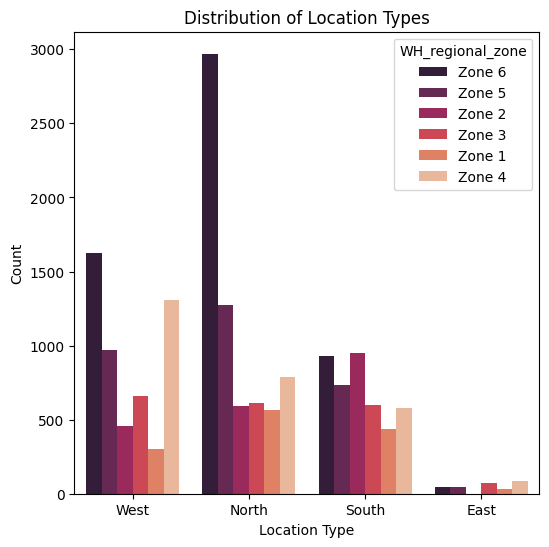

In [268]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_train, x='zone',hue='WH_regional_zone',palette='rocket')
plt.title('Distribution of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

Zone 6 in north has the largest number of warehouses and the least number of warehouses are in  Zone 1 in East .
Zone 2 in East doesnot have any warehouses.

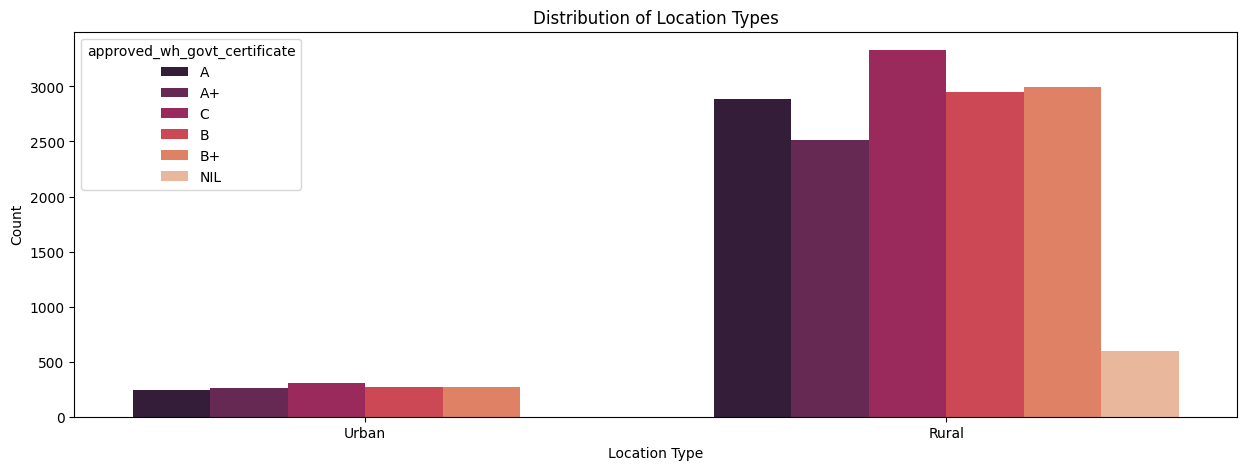

In [269]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_train, hue='approved_wh_govt_certificate',x='Location_type',palette='rocket')
plt.title('Distribution of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

Most warehouses in rural  area are 'C' grade certified,followed by B+ and B.
In Urban areas most of them are 'C' certified, and almost equal number of warehouses with A+, B and B+ grades.

## Observation from numerical and categorical features 

    1. Most of the warehouses are present in the rural area.This may be due to easier availability of raw materials , more land for building warehouses     and other geographical features.
    2. Also the warehouses in rural areas have much larger capacity than compared to urban areas. This may be due to the unavailabilty of large area in     urban places.
    3. Majority of the warehouses are owned by the company itself .
    4. Most warehouses are C grade certified  .

## Feature Selection

In [270]:
num_cols.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

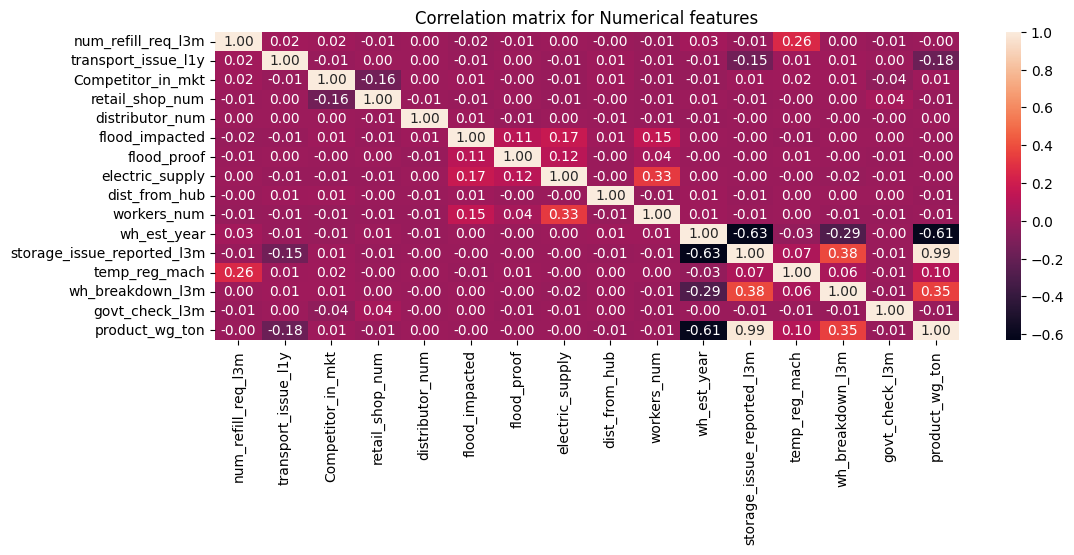

In [271]:
#correlation matrix
correlation_matrix=num_cols.corr()
#plotting heatmap
plt.figure(figsize=(12,4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='rocket')
plt.title('Correlation matrix for Numerical features')
plt.show()


### OBSERVATIONS
    Numerical Features that are highly correlated with product _wg_ton:

#### (1) storage_issue_reported_13m : positive correlation coefficient = 0.99
    This indicates a strong relation between storage issue reported in last 3 months  and weight of product shipped from the warehouse.
    As storage issue increase ,weight of product shipped from that warehouse also increases.

#### (2) wh_breakdown_13m : positive correlation coefficient = 0.35
    Even though this indicates only a moderate correlation , it can be helpful in making the model.
    
#### (3) wh_est_year : negative correlation coefficient = -0.61
    Warehouse establishment year shows a relatively strong negative correlation with product weight .
    Newly established warehouses tend to ship more product than old warehouses.



In [272]:
cat_cols.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

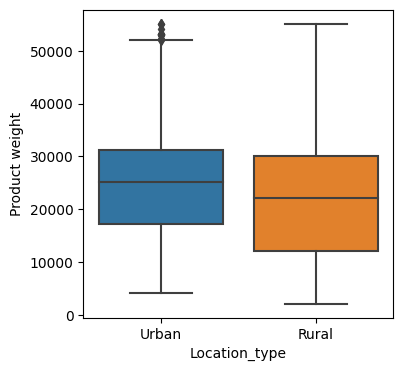

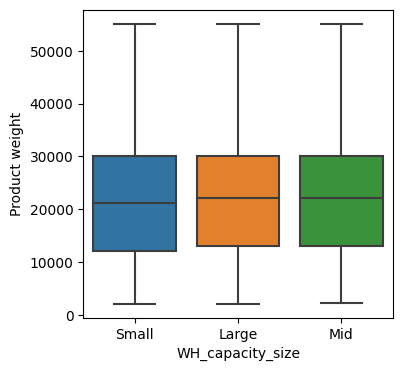

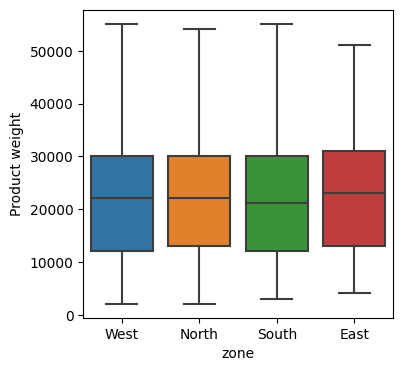

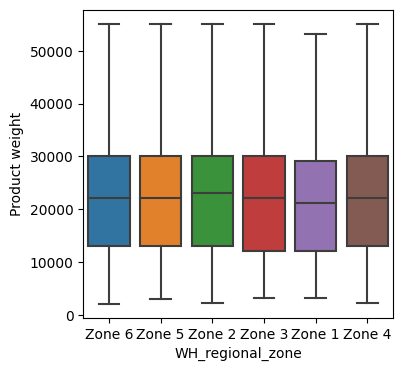

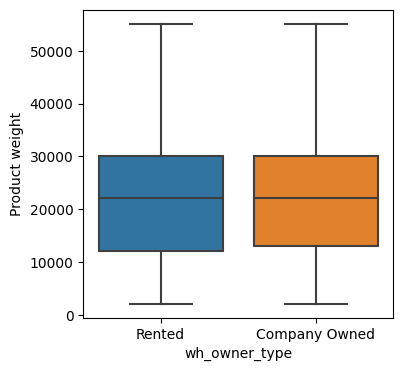

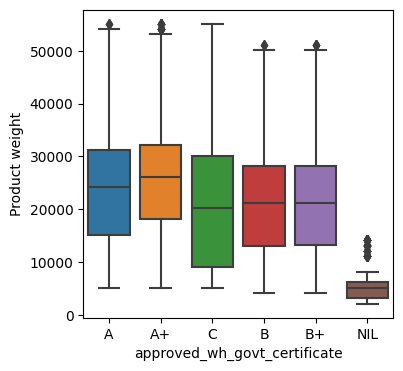

In [273]:
k=['Location_type', 'WH_capacity_size','zone', 'WH_regional_zone', 'wh_owner_type','approved_wh_govt_certificate']
for i in k:
    plt.figure(figsize=(4,4))
    sns.boxplot(data = df_train, x=i, y ='product_wg_ton')
    plt.xlabel(i)
    plt.ylabel('Product weight')
    plt.show()
    

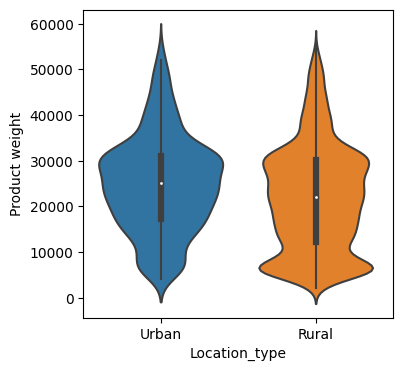

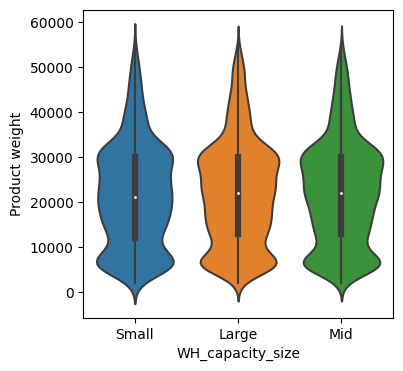

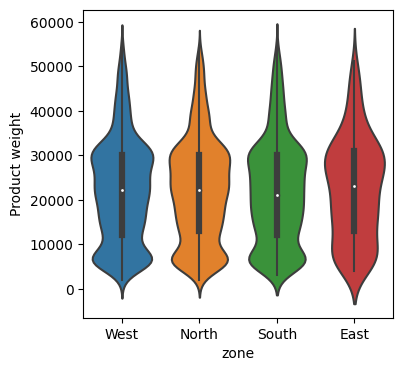

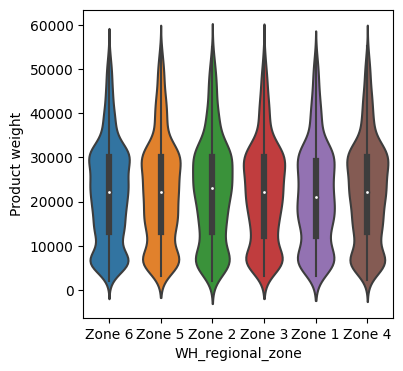

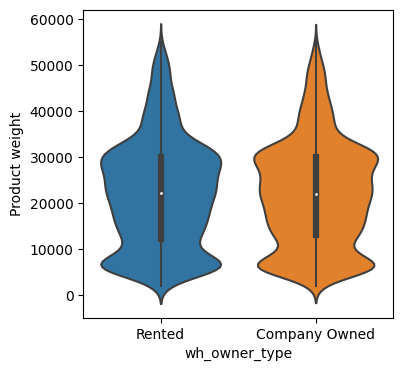

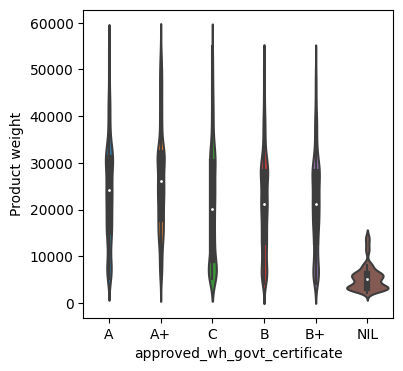

In [274]:
k=['Location_type', 'WH_capacity_size','zone', 'WH_regional_zone', 'wh_owner_type','approved_wh_govt_certificate']
for i in k:
    plt.figure(figsize=(4,4))
    sns.violinplot(data = df_train, x=i, y ='product_wg_ton')
    plt.xlabel(i)
    plt.ylabel('Product weight')
    plt.show()

### OBSERVATIONS
    Categorical Features that are highly correlated with product _wg_ton:
#### (1) Location_type : 
    Whether the warehouse is in Urban or Rural area influences the product weight shipped
#### (2) WH_capacity_size :
    Small ,Mid or Large the warhouse influence the product weight
#### (3) zone :
    Zone of the warehouse whether it is from North,South,East or west can impact the product weight
#### (4) WH_regional_zone :
    Regional zones can also affect the weight of product
#### (5) approved_wh_govt_certificate :
    Government certification grades also influences the weight of product shipped from each warehouse.
    
    

## Feature that affect the target variable
1) storage_issue_reported_13m 
2) wh_breakdown_13m
3) wh_est_year
4) Location_type
5) WH_capacity_size
6) zone
7) WH_regional_zone
8) approved_wh_govt_certificate

#### Removing unimportant features from training and testing dataset

In [275]:
#training dataset with necessary features
df_training=df_train[['storage_issue_reported_l3m','wh_breakdown_l3m','wh_est_year',
'Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate','product_wg_ton']]
df_training

,storage_issue_reported_l3m,wh_breakdown_l3m,wh_est_year,Location_type,WH_capacity_size,zone,WH_regional_zone,approved_wh_govt_certificate,product_wg_ton
0,13,5,2009.0,Urban,Small,West,Zone 6,A,17115
1,4,3,2009.0,Rural,Large,North,Zone 5,A,5074
2,17,6,2009.0,Rural,Mid,South,Zone 2,A,23137
3,17,3,2009.0,Rural,Mid,North,Zone 3,A+,22115
4,18,6,2009.0,Rural,Large,North,Zone 5,C,24071
...,...,...,...,...,...,...,...,...,...
16615,14,5,2009.0,Urban,Large,West,Zone 6,B+,16094
16616,17,6,2009.0,Urban,Large,North,Zone 5,B+,21113
16617,24,5,2003.0,Rural,Large,North,Zone 6,B,28117
16618,16,5,2007.0,Rural,Small,West,Zone 6,A,21103


In [276]:
#testing dataset with necessary features
df_testing=df_test[['storage_issue_reported_l3m','wh_breakdown_l3m','wh_est_year',
'Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate','product_wg_ton']]
df_testing

,storage_issue_reported_l3m,wh_breakdown_l3m,wh_est_year,Location_type,WH_capacity_size,zone,WH_regional_zone,approved_wh_govt_certificate,product_wg_ton
0,24,2,2006.0,Rural,Large,North,Zone 5,A,30132
1,5,2,2019.0,Rural,Large,North,Zone 5,C,6075
2,19,5,2008.0,Rural,Small,North,Zone 6,A+,24076
3,9,3,2017.0,Rural,Mid,West,Zone 4,A+,13092
4,25,4,1999.0,Urban,Mid,North,Zone 4,B,29071
...,...,...,...,...,...,...,...,...,...
5524,22,2,2007.0,Rural,Large,North,Zone 6,A+,29138
5525,26,5,2010.0,Rural,Small,South,Zone 6,C,33108
5526,20,6,2010.0,Rural,Large,North,Zone 6,B+,24072
5527,13,3,2010.0,Rural,Large,North,Zone 6,B,15055


## Encoding categorical variables with One Hot encoder

In [277]:
#training dataset
from sklearn.preprocessing import LabelEncoder
df_training_one_hot_encoded = pd.get_dummies(data = df_training, columns = ['Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate'])
df_training_one_hot_encoded.head(2)

,storage_issue_reported_l3m,wh_breakdown_l3m,wh_est_year,product_wg_ton,Location_type_Rural,Location_type_Urban,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small,zone_East,...,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,approved_wh_govt_certificate_NIL
0,13,5,2009.0,17115,False,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
1,4,3,2009.0,5074,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [278]:
#testing dataset
from sklearn.preprocessing import LabelEncoder
df_testing_one_hot_encoded = pd.get_dummies(data = df_testing, columns = ['Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate'])
df_testing_one_hot_encoded.head(2)

,storage_issue_reported_l3m,wh_breakdown_l3m,wh_est_year,product_wg_ton,Location_type_Rural,Location_type_Urban,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small,zone_East,...,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,approved_wh_govt_certificate_NIL
0,24,2,2006.0,30132,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,5,2,2019.0,6075,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


## Splitting dataset

In [279]:
x_train=df_training_one_hot_encoded.drop(['product_wg_ton'],axis=1)
x_train.head(2)

,storage_issue_reported_l3m,wh_breakdown_l3m,wh_est_year,Location_type_Rural,Location_type_Urban,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small,zone_East,zone_North,...,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,approved_wh_govt_certificate_NIL
0,13,5,2009.0,False,True,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
1,4,3,2009.0,True,False,True,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False


In [280]:
y_train=df_training_one_hot_encoded.product_wg_ton
y_train.head(2)

0    17115
1     5074
Name: product_wg_ton, dtype: int64

In [281]:
x_test=df_testing_one_hot_encoded.drop(['product_wg_ton'],axis=1)
x_test.head(2)

,storage_issue_reported_l3m,wh_breakdown_l3m,wh_est_year,Location_type_Rural,Location_type_Urban,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small,zone_East,zone_North,...,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,approved_wh_govt_certificate_NIL
0,24,2,2006.0,True,False,True,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
1,5,2,2019.0,True,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [282]:
y_test=df_testing_one_hot_encoded.product_wg_ton
y_test.head(2)

0    30132
1     6075
Name: product_wg_ton, dtype: int64

## Model Selection

    1)Linear Regression
    2)Decision Tree
    3)Random Forest
    4)Support Vector Regression
    5)Gradient Boosting Regression
    6)AdaBoost Regression
    7)XGB Regressor

## Model Training and Evaluation

#### 1) Linear regression

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

In [284]:
#mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean squared error :", mse_lr)

Mean squared error : 1408145.0412855104


In [285]:
#Root mean squared error
rmse_lr = np.sqrt(mse_lr)
print("Root Mean Squared Error :", rmse_lr)

Root Mean Squared Error : 1186.6528731206572


In [286]:
#r2 score
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared :", r2_lr)

R-squared : 0.9896153496407339


In [287]:
#mean absolute error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error :", mae_lr)

Mean Absolute Error : 920.2777105972134


#### 2) Decision Tree

In [288]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_dt=DecisionTreeRegressor(max_depth=4, random_state=42)
model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)

In [289]:
#mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean squared error :", mse_dt)


Mean squared error : 2969648.887879041


In [290]:
#Root mean squared error
rmse_dt = np.sqrt(mse_dt)
print("Root Mean Squared Error :", rmse_dt)

Root Mean Squared Error : 1723.2669229922105


In [291]:
#r2 score
r2_dt = r2_score(y_test, y_pred_dt)
print("R-squared :", r2_dt)

R-squared : 0.9780997237598095


In [292]:
#mean absolute error
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error :", mae_dt)

Mean Absolute Error : 1327.2888012649255


#### 3) Random Forest

In [293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_rf=RandomForestRegressor(max_depth=4,random_state=42)
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

In [294]:
#mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean squared error :", mse_rf)

Mean squared error : 2689706.8547767685


In [295]:
#Root mean squared error
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error :", rmse_rf)

Root Mean Squared Error : 1640.0325773522818


In [296]:
#r2 score
r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared :", r2_rf)

R-squared : 0.9801642128922466


In [297]:
#mean absolute error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error :", mae_rf)

Mean Absolute Error : 1252.4845379098567


#### 4) Support vector regression (SVR)

In [298]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_svr=SVR()
model_svr.fit(x_train,y_train)
y_pred_svr=model_svr.predict(x_test)

In [299]:
#mean squared error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean squared error :", mse_svr)

Mean squared error : 135585211.1318


In [300]:
#Root mean squared error
rmse_svr = np.sqrt(mse_svr)
print("Root Mean Squared Error :", rmse_svr)

Root Mean Squared Error : 11644.106283085877


In [301]:
#r2 score
r2_svr = r2_score(y_test, y_pred_svr)
print("R-squared :", r2_svr)

R-squared : 9.944273522455305e-05


In [302]:
#mean absolute error
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error :", mae_svr)

Mean Absolute Error : 9613.042013127173


#### 5) Gradient Boosting Regression

In [303]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_gbr=DecisionTreeRegressor(max_depth=4, random_state=42)
model_gbr.fit(x_train,y_train)
y_pred_gbr=model_dt.predict(x_test)

In [304]:
#mean squared error
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print("Mean squared error :", mse_gbr)

Mean squared error : 2969648.887879041


In [305]:
#Root mean squared error
rmse_gbr = np.sqrt(mse_gbr)
print("Root Mean Squared Error :", rmse_gbr)

Root Mean Squared Error : 1723.2669229922105


In [306]:
#r2 score
r2_gbr = r2_score(y_test, y_pred_gbr)
print("R-squared :", r2_gbr)

R-squared : 0.9780997237598095


In [307]:
#mean absolute error
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print("Mean Absolute Error :", mae_gbr)

Mean Absolute Error : 1327.2888012649255


#### 6) AdaBoost Regressor

In [308]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_abr=AdaBoostRegressor( random_state=42)
model_abr.fit(x_train,y_train)
y_pred_abr=model_abr.predict(x_test)

In [309]:
#mean squared error
mse_abr = mean_squared_error(y_test, y_pred_abr)
print("Mean squared error :", mse_abr)

Mean squared error : 2912539.898409179


In [310]:
#Root mean squared error
rmse_abr = np.sqrt(mse_abr)
print("Root Mean Squared Error :", rmse_abr)

Root Mean Squared Error : 1706.6165059582597


In [311]:
#r2 score
r2_abr = r2_score(y_test, y_pred_abr)
print("R-squared :", r2_abr)

R-squared : 0.9785208855511219


In [312]:
#mean absolute error
mae_abr = mean_absolute_error(y_test, y_pred_abr)
print("Mean Absolute Error :", mae_abr)

Mean Absolute Error : 1373.6611714175594


#### 7) XGB Regressor

In [313]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)

In [314]:
#mean squared error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean squared error :", mse_xgb)

Mean squared error : 1266709.15473417


In [315]:
#Root mean squared error
rmse_xgb = np.sqrt(mse_xgb)
print("Root Mean Squared Error :", rmse_xgb)

Root Mean Squared Error : 1125.481743403317


In [316]:
#r2 score
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R-squared :", r2_xgb)

R-squared : 0.9906583971869921


In [317]:
#mean absolute error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error :", mae_xgb)

Mean Absolute Error : 839.7236433217184


## Model Prediction

In [318]:
accuracy_data = [['Linear Regression',mse_lr, rmse_lr, mae_lr, r2_lr],
        ['Decision Tree',mse_dt, rmse_dt, mae_dt, r2_dt],
        ['Random Forest', mse_rf, rmse_rf, mae_rf, r2_rf],
        ['Support Vector Regression',mse_svr, rmse_svr, mae_svr, r2_svr],
        ['Gradient Boosting Regression',mse_gbr, rmse_gbr, mae_gbr, r2_gbr],
        ['AdaBoost Regression',mse_abr, rmse_abr, mae_abr, r2_abr],
        ['XGBoost Regression',mse_xgb, rmse_xgb, mae_xgb, r2_xgb]]
accuracy_df = pd.DataFrame(accuracy_data, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2 SCORE'])
accuracy_df['MSE'] =accuracy_df['MSE'].apply(np.int64)
accuracy_df

,Model,MSE,RMSE,MAE,R2 SCORE
0,Linear Regression,1408145,1186.652873,920.277711,0.989615
1,Decision Tree,2969648,1723.266923,1327.288801,0.978100
2,Random Forest,2689706,1640.032577,1252.484538,0.980164
3,Support Vector Regression,135585211,11644.106283,9613.042013,0.000099
4,Gradient Boosting Regression,2969648,1723.266923,1327.288801,0.978100
5,AdaBoost Regression,2912539,1706.616506,1373.661171,0.978521
6,XGBoost Regression,1266709,1125.481743,839.723643,0.990658


### From this accuracy scores ,we can conclude that the best fit model is "XGBoost Regression"

#### Plotting Actual and Predicted values

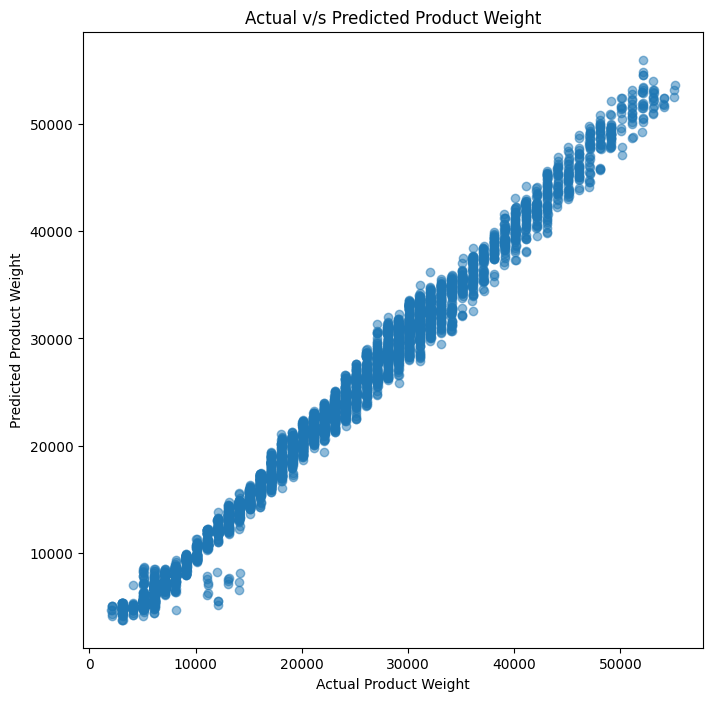

In [319]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Actual v/s Predicted Product Weight")
plt.show()

All the datapoints are very close to each other which means the value predicted by the model is very similar to actual values in the dataset

## CONCLUSION


    Among the 7 models that were created the XGBoost Regression model performed well with a high R2 score of 99% and least mean squared error.
    Implementing the best machine learning algorithm (XGBoost Regression) into supply chain management can help to optimize the quantity 
    shipped there  by making profits.This can help in avoiding the mismatch between demand and supply.